# Import libraries

In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Import Data

In [2]:
red_df = pd.read_csv("Data/winequality-red.csv", delimiter=",")
white_df = pd.read_csv("Data/winequality-white.csv", delimiter=",")  

In [3]:
red_df.head()
#red_df['quality'].value_counts()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white_df.head()
#white_df['quality'].value_counts()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Train Test Split

In [5]:
red_X = red_df.drop(columns = "quality")
white_X = white_df.drop(columns = "quality")

In [6]:
red_y = red_df["quality"]
white_y = white_df["quality"]

In [7]:
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(red_X, red_y, stratify=red_y, random_state=42)
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(white_X, white_y, stratify=white_y, random_state=42)

In [8]:
number_list = np.array(y_train_white)
(unique, counts) = np.unique(number_list, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[   3,   15],
       [   4,  122],
       [   5, 1093],
       [   6, 1648],
       [   7,  660],
       [   8,  131],
       [   9,    4]], dtype=int64)

In [9]:
number_list = np.array(y_test_white)
(unique, counts) = np.unique(number_list, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[  3,   5],
       [  4,  41],
       [  5, 364],
       [  6, 550],
       [  7, 220],
       [  8,  44],
       [  9,   1]], dtype=int64)

# Decision Tree Model

In [10]:
red_clf = DecisionTreeClassifier()
red_clf = red_clf.fit(red_X, red_y)
red_clf.score(red_X, red_y)

1.0

In [11]:
white_clf = DecisionTreeClassifier()
white_clf = white_clf.fit(white_X, white_y)
white_clf.score(white_X, white_y)

1.0

# Print Text Representation

In [12]:
text_representation = tree.export_text(red_clf)
print(text_representation)

|--- feature_10 <= 10.25
|   |--- feature_9 <= 0.57
|   |   |--- feature_6 <= 98.50
|   |   |   |--- feature_10 <= 9.75
|   |   |   |   |--- feature_10 <= 9.08
|   |   |   |   |   |--- feature_0 <= 7.80
|   |   |   |   |   |   |--- feature_9 <= 0.51
|   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |--- feature_9 >  0.51
|   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |--- feature_0 >  7.80
|   |   |   |   |   |   |--- feature_2 <= 0.55
|   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |--- feature_2 >  0.55
|   |   |   |   |   |   |   |--- feature_7 <= 1.00
|   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |--- feature_7 >  1.00
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_10 >  9.08
|   |   |   |   |   |--- feature_8 <= 3.54
|   |   |   |   |   |   |--- feature_3 <= 4.40
|   |   |   |   |   |   |   |--- feature_1 <= 0.23
|   |   |   |   |   |   |   |   |--- feature_10 <= 9.35
|   |   |

In [13]:
text_representation = tree.export_text(white_clf)
print(text_representation)

|--- feature_10 <= 10.85
|   |--- feature_1 <= 0.24
|   |   |--- feature_10 <= 8.85
|   |   |   |--- feature_0 <= 7.25
|   |   |   |   |--- feature_8 <= 3.09
|   |   |   |   |   |--- feature_0 <= 6.85
|   |   |   |   |   |   |--- feature_0 <= 6.25
|   |   |   |   |   |   |   |--- feature_2 <= 0.34
|   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |   |--- feature_2 >  0.34
|   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |--- feature_0 >  6.25
|   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- feature_0 >  6.85
|   |   |   |   |   |   |--- class: 8
|   |   |   |   |--- feature_8 >  3.09
|   |   |   |   |   |--- feature_7 <= 1.00
|   |   |   |   |   |   |--- feature_7 <= 1.00
|   |   |   |   |   |   |   |--- feature_8 <= 3.40
|   |   |   |   |   |   |   |   |--- feature_4 <= 0.05
|   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |   |--- feature_4 >  0.05
|   |   |   |   |   |   |   |   |   |--- feature

# Plot the Trees

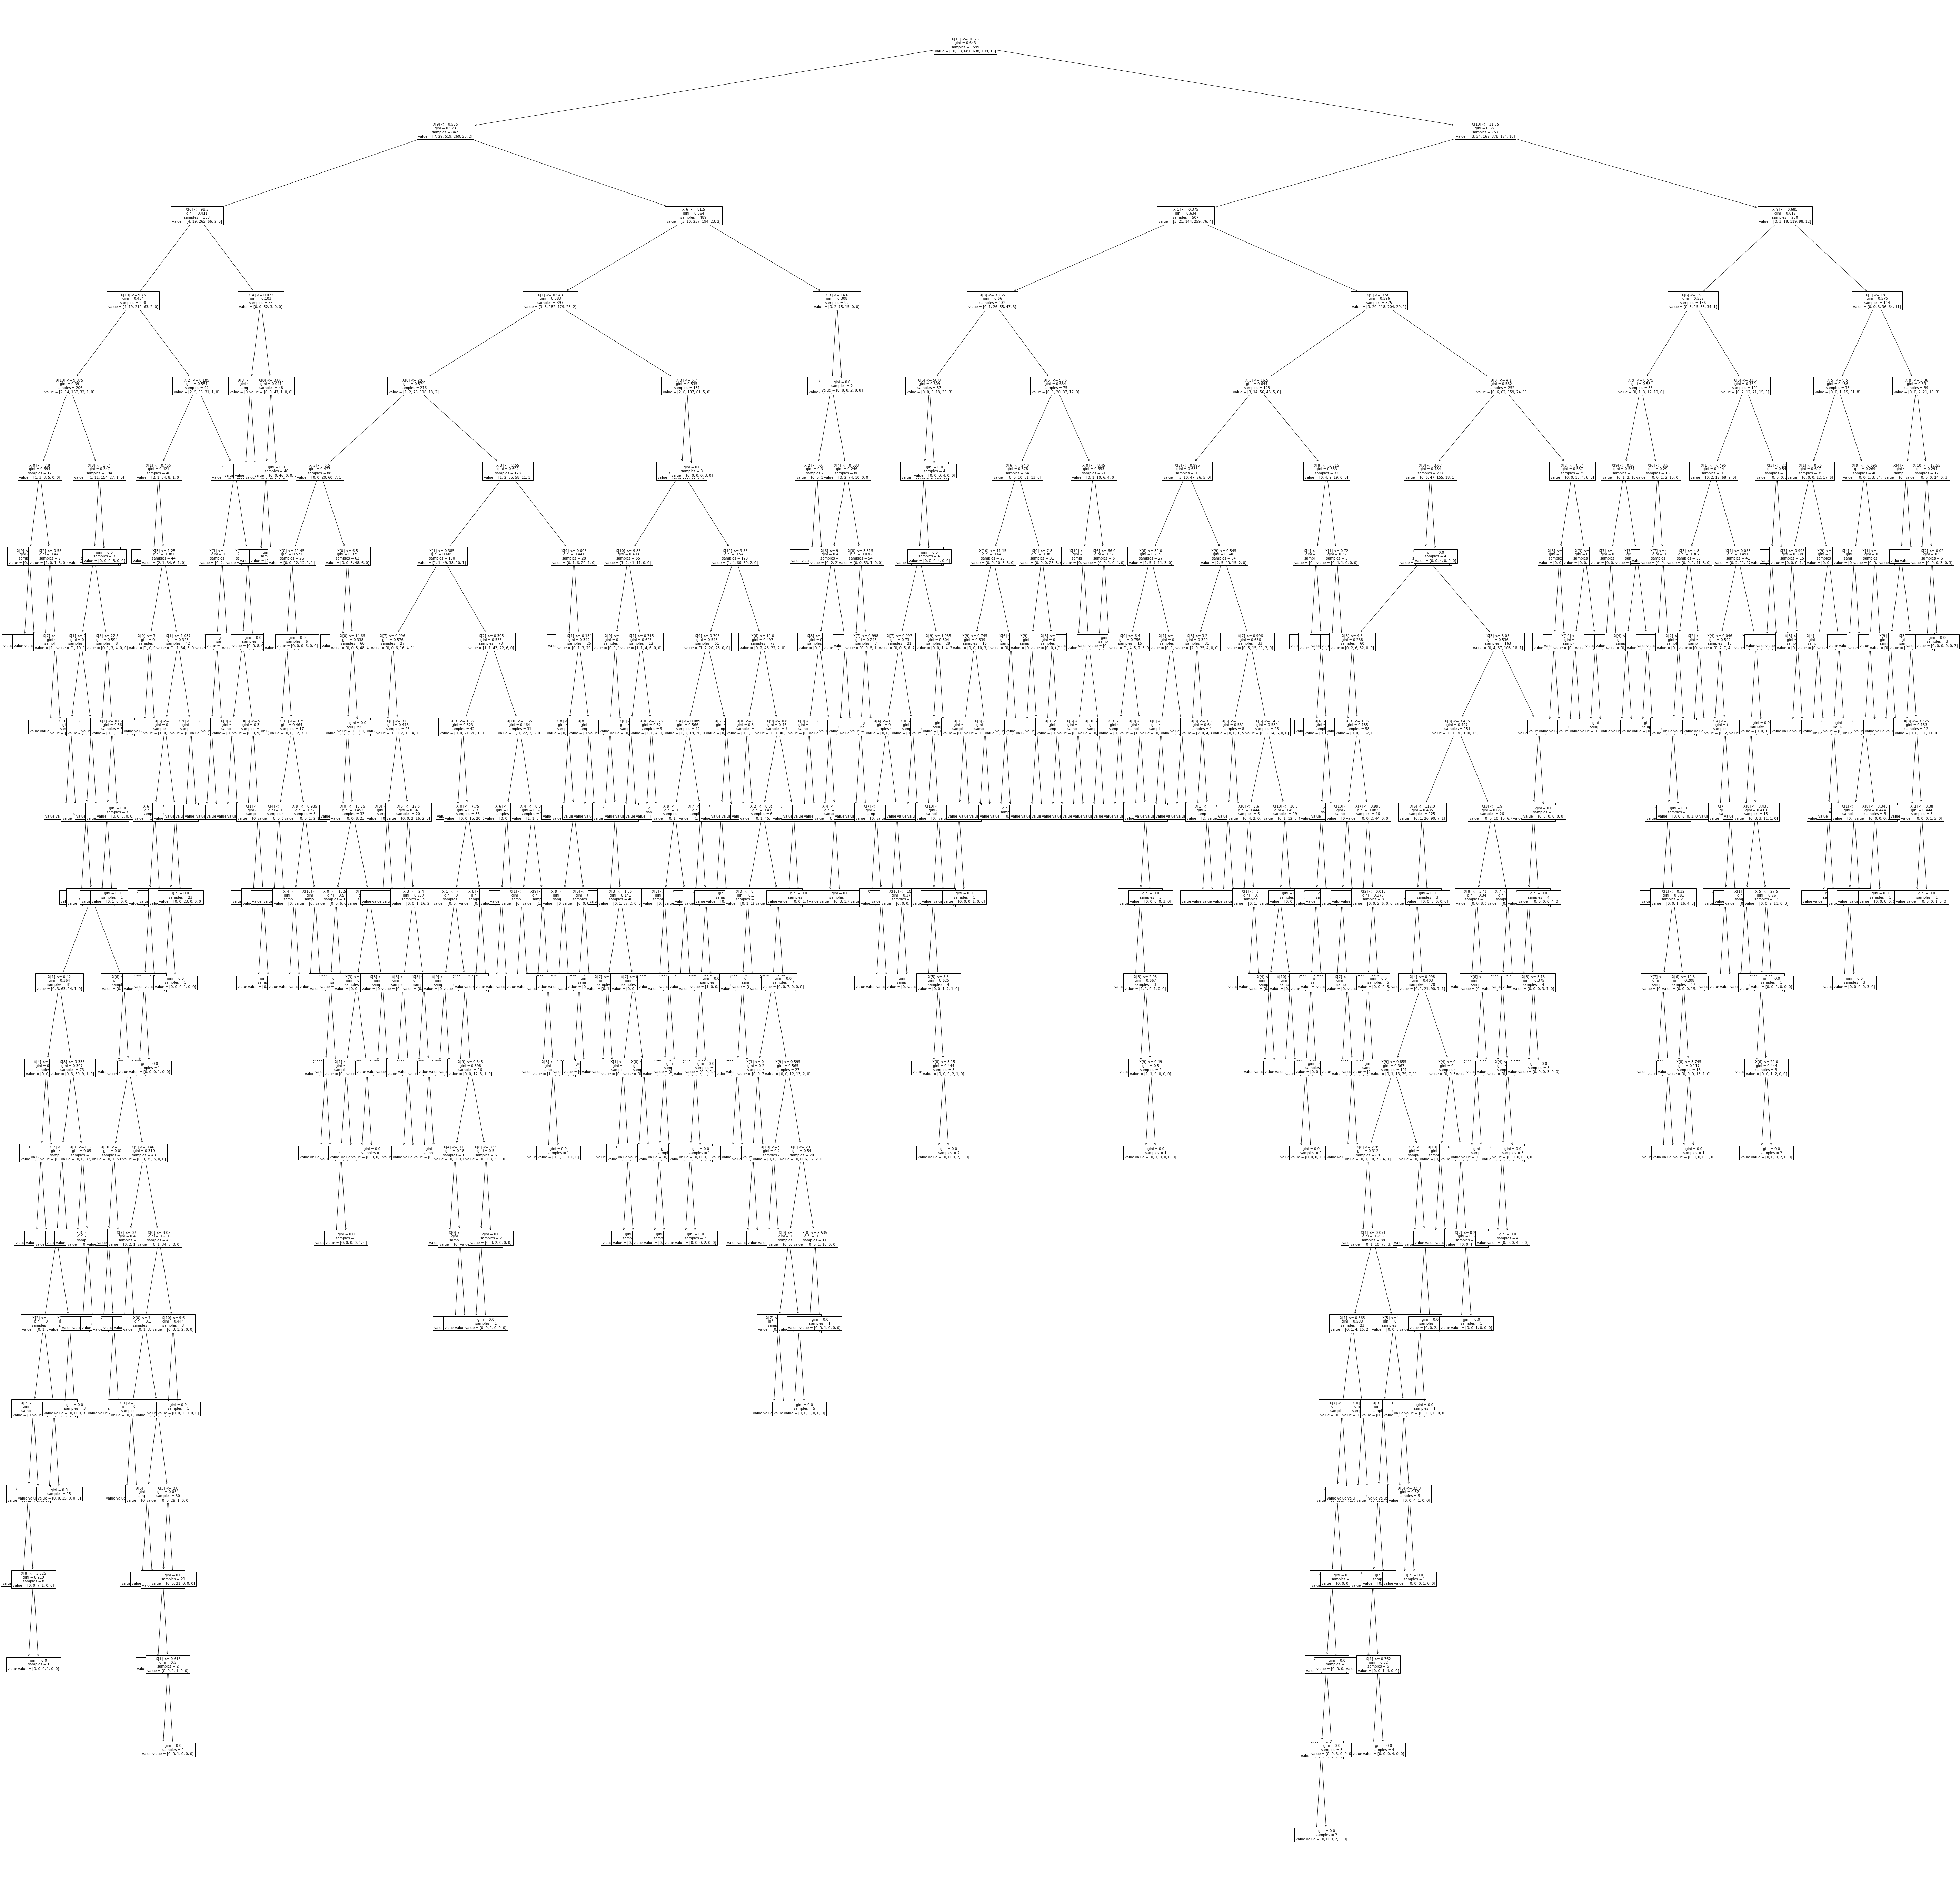

In [14]:
fig, ax = plt.subplots(figsize=(100, 100))
tree.plot_tree(red_clf, fontsize=10)
plt.show()

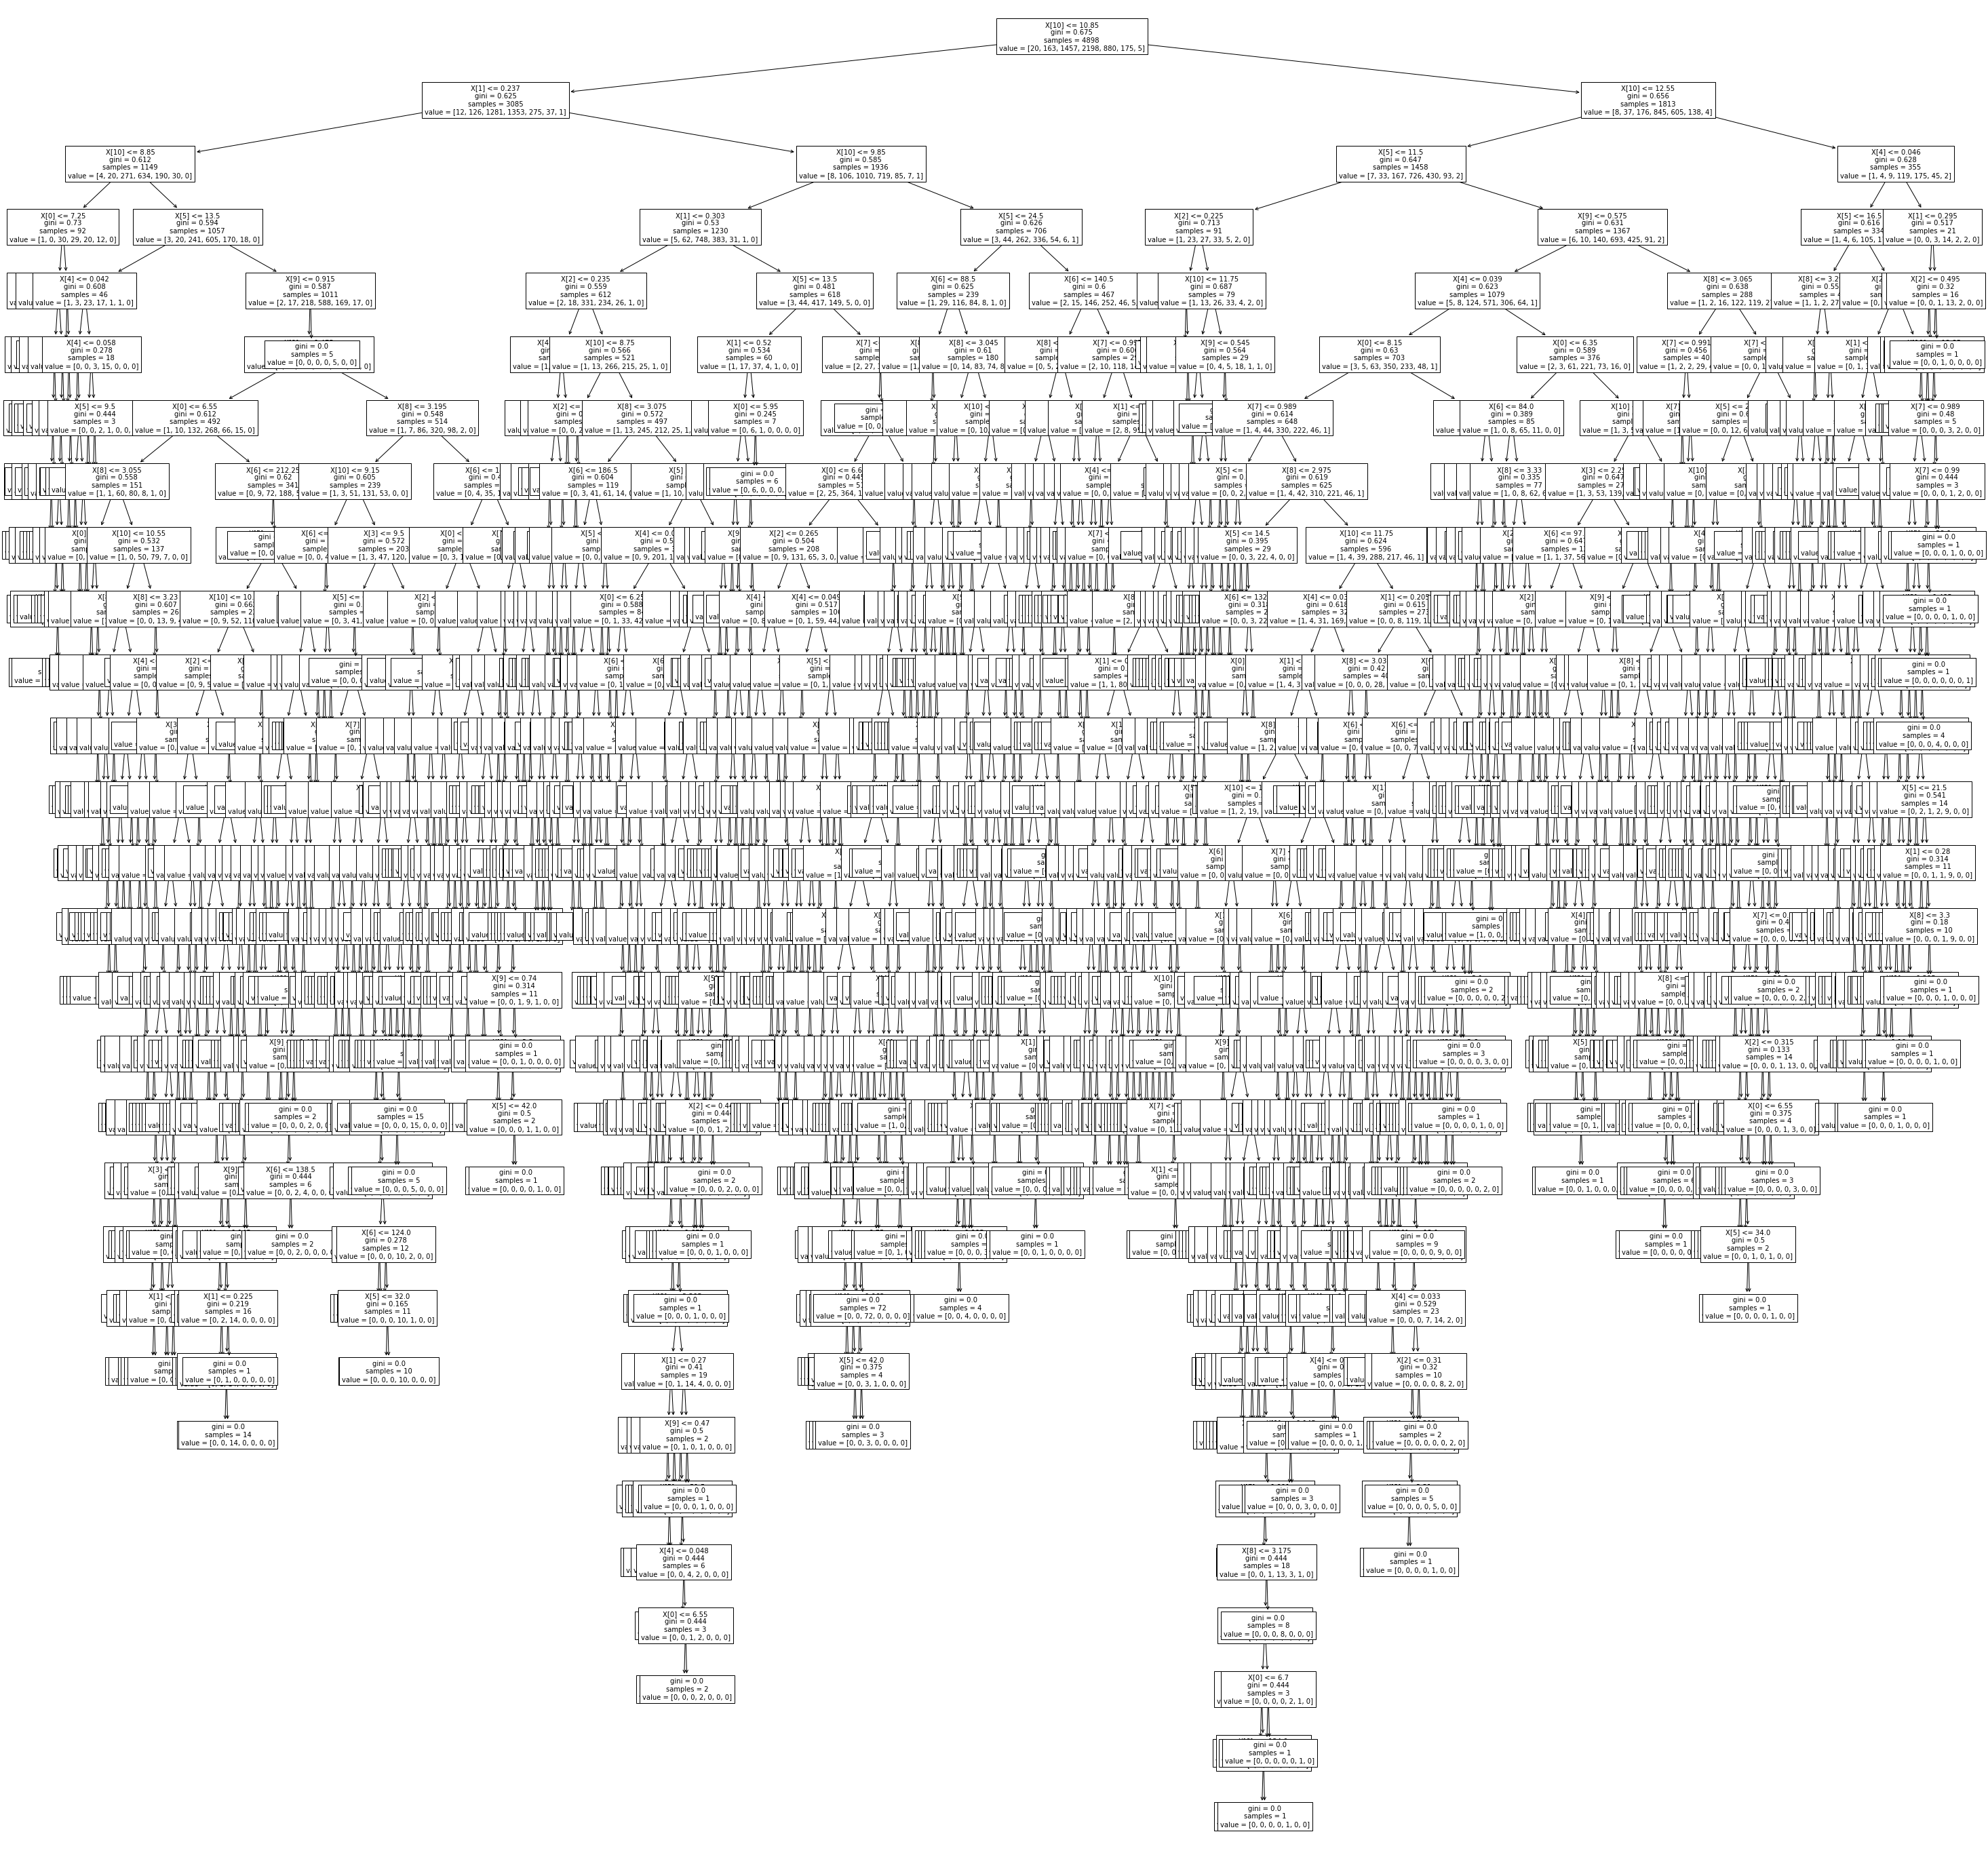

In [15]:
fig, ax = plt.subplots(figsize=(50, 50))
tree.plot_tree(white_clf, fontsize=10)
plt.show()